In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('/content/Airlines+Data.xlsx')
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
df1=df.copy()

In [4]:
df1.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [6]:
df1.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [7]:
df1=df1.set_index('Month')

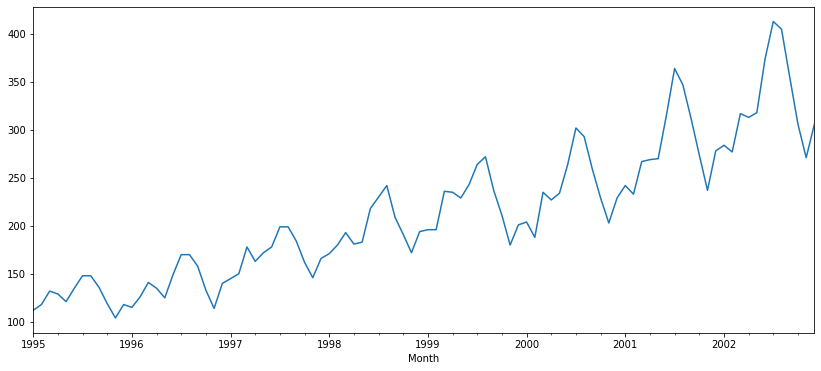

In [8]:
import matplotlib.pyplot as plt
df1['Passengers'].plot(figsize=(14,6))
plt.show()

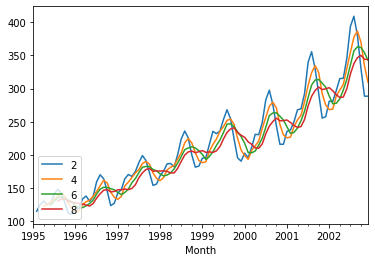

In [9]:
for i in range(2,10,2):
  df1['Passengers'].rolling(i).mean().plot(label=str(i))
  plt.legend(loc=3)

#Building Time Series Forecasting with ARIMA

In [10]:
X=df1['Passengers'].values
size=int(len(X)*0.66)

In [11]:
train,test=X[0:size],X[size:len(X)]

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(5,1,0))
model_fit=model.fit(disp=0)

In [13]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -262.909
Method:                       css-mle   S.D. of innovations             16.748
Date:                Thu, 15 Dec 2022   AIC                            539.817
Time:                        06:46:41   BIC                            554.707
Sample:                             1   HQIC                           545.663
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7497      1.477      1.185      0.236      -1.145       4.644
ar.L1.D.y      0.0905      0.134      0.677      0.498      -0.171       0.352
ar.L2.D.y     -0.2096      0.135     -1.549      0.1

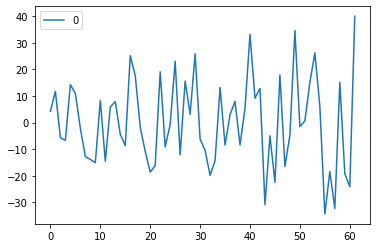

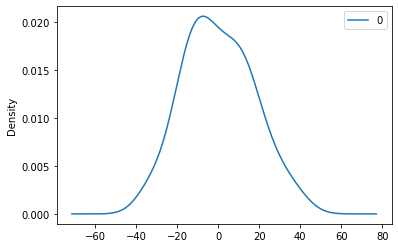

               0
count  62.000000
mean    0.057351
std    16.895802
min   -34.303300
25%   -12.610654
50%    -1.589480
75%    12.565603
max    39.955354


In [14]:
from matplotlib import pyplot
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Rolling Forescast ARIMA Model

In [15]:
history=[X for X in train]
predictions=list()

In [16]:
for t in range (len(test)):
  model=ARIMA(history,order=(5,1,0))
  model_fit=model.fit(disp=0)
  output=model_fit.forecast()
  yhat=output[0]
  predictions.append(yhat)
  obs=test[t]
  history.append(obs)
  print('predicted=%f,expected=%f'%(yhat,obs))

predicted=239.755201,expected=227.000000
predicted=220.737320,expected=234.000000
predicted=237.815016,expected=264.000000
predicted=252.750595,expected=302.000000
predicted=306.715968,expected=293.000000
predicted=285.374658,expected=259.000000
predicted=250.264002,expected=229.000000
predicted=227.093128,expected=203.000000
predicted=211.011438,expected=229.000000
predicted=253.260263,expected=242.000000
predicted=252.490668,expected=233.000000
predicted=234.042130,expected=267.000000
predicted=268.773623,expected=269.000000
predicted=261.782249,expected=270.000000
predicted=271.798044,expected=315.000000
predicted=314.422112,expected=364.000000
predicted=368.637707,expected=347.000000
predicted=334.957876,expected=312.000000
predicted=301.161837,expected=274.000000
predicted=265.936490,expected=237.000000
predicted=244.037204,expected=278.000000
predicted=312.961762,expected=284.000000
predicted=291.748169,expected=277.000000
predicted=284.551896,expected=317.000000
predicted=316.50

In [17]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions)
print('Test MSE:%.3f'%error)

Test MSE:782.495


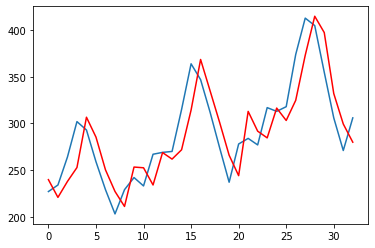

In [18]:
pyplot.plot(test)
pyplot.plot(predictions,color='red')
pyplot.show()

#Comparing Multiple Models

In [23]:
df2=df.copy()

In [24]:
df2=pd.get_dummies(df2,columns=['Month'])

In [25]:
df2.head()

,Passengers,Month_1995-01-01 00:00:00,Month_1995-02-01 00:00:00,Month_1995-03-01 00:00:00,Month_1995-04-01 00:00:00,Month_1995-05-01 00:00:00,Month_1995-06-01 00:00:00,Month_1995-07-01 00:00:00,Month_1995-08-01 00:00:00,Month_1995-09-01 00:00:00,...,Month_2002-03-01 00:00:00,Month_2002-04-01 00:00:00,Month_2002-05-01 00:00:00,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df2.shape

(96, 97)

In [27]:
t=np.arange(1,97)

In [28]:
df2['t']=t

In [29]:
df2['t_sq']=df2['t']*df2['t']

In [31]:
log_Passengers=np.log(df2['Passengers'])

In [33]:
df2['log_Passengers']=log_Passengers

In [34]:
df2.head()

,Passengers,Month_1995-01-01 00:00:00,Month_1995-02-01 00:00:00,Month_1995-03-01 00:00:00,Month_1995-04-01 00:00:00,Month_1995-05-01 00:00:00,Month_1995-06-01 00:00:00,Month_1995-07-01 00:00:00,Month_1995-08-01 00:00:00,Month_1995-09-01 00:00:00,...,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00,t,t_sq,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5,25,4.795791


In [35]:
train1,test1=np.split(df2,[int(.67*len(df2))])

#Linear Model

In [38]:
import statsmodels.formula.api as smf
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.50398351648347

In [40]:
quad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad

53.189555144151804

In [41]:
expo=smf.ols('Passengers~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

1.6030945933279498e+128

#Conclusion

In [59]:

output={'Model':pd.Series(['linear','quad','expo']),
        'Values':pd.Series([linear,quad,expo])}

In [60]:
rmse=pd.DataFrame(output)

In [61]:
print(rmse)

    Model                                             Values
0  linear  <statsmodels.regression.linear_model.Regressio...
1    quad  <statsmodels.regression.linear_model.Regressio...
2    expo  <statsmodels.regression.linear_model.Regressio...
